# Exercise 2
Sandra Marcela Meneses código:201727731      
Diego Fernando López Castillo Código:200919053

# Exercise 02

Estimate a regression using the Income data


## Forecast of income

We'll be working with a dataset from US Census indome ([data dictionary](https://archive.ics.uci.edu/ml/datasets/Adult)).

Many businesses would like to personalize their offer based on customer’s income. High-income customers could be, for instance, exposed to premium products. As a customer’s income is not always explicitly known, predictive model could estimate income of a person based on other information.

Our goal is to create a predictive model that will be able to output an estimation of a person income.

In [136]:
import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt

# read the data and set the datetime as the index
import zipfile
with zipfile.ZipFile('../datasets/income.csv.zip', 'r') as z:
    f = z.open('income.csv')
    income = pd.read_csv(f, index_col=0)

income.head()

,Age,Workclass,fnlwgt,Education,Education-Num,Martial Status,Occupation,Relationship,Race,Sex,Capital Gain,Capital Loss,Hours per week,Country,Income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,51806.0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,68719.0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,51255.0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,47398.0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,30493.0


In [137]:
income.shape

(32561, 15)

# Exercise 2.1 

1. What is the relation between the age and Income?

2. For a one percent increase in the Age how much the income increases?

3. Using sklearn estimate a linear regression and predict the income when the Age is 30 and 40 years

Text(0,0.5,'Income')

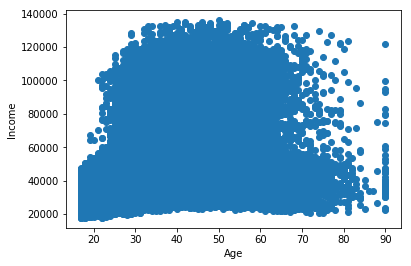

In [139]:
#1. What is the relation between the age and Income?
income.columns
y_ = income['Income'].values
X_ = income['Age'].values
plt.scatter(X_,y_)
plt.xlabel('Age')
plt.ylabel('Income')
#Se visualiza la relación entre edad e ingreso visualizando un scatterplot. 
#No existe un marcado incremento en el ingreso a medida que aumenta la edad, 
#dado que los puntos están dispersos alrededor de la media, sin seguir una tendencia

In [140]:
#Librerias
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDRegressor

#For a one percent increase in the Age how much the income increases?

#Se corre el modelo de regresión lineal con LinearRegression (OLS)
linreg = LinearRegression(fit_intercept=True)
linreg.fit(income[["Age"]], income[["Income"]])
#Se visualizan los coeficientes
linreg.coef_
# Por un incremento de un año en edad, incrementa el ingreso en 542.17

array([[ 542.16765707]])

In [141]:
#Using sklearn estimate a linear regression and predict the income when the Age is 30 and 40 years
#predict
ypred = linreg.predict(income[['Age']])
ypred

array([[ 53682.62675669],
       [ 59646.47098449],
       [ 53140.45909962],
       ..., 
       [ 63983.81224107],
       [ 44465.77658646],
       [ 60730.80629863]])

In [142]:
# Predicción para 30 años
linreg.predict(30)


array([[ 48803.11784304]])

In [143]:
# Predicción para 40 años
linreg.predict(40)

array([[ 54224.79441376]])

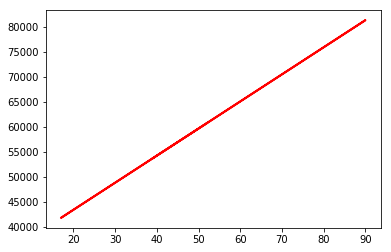

In [144]:
#Se visualiza con los anteriores resultados que la tendencia es que a medida que aumenta
#la edad, aumenta el ingreso
#Se realiza el gráfico de la regresión.
# Plot the linear regression
plt.plot(income[["Age"]], yhat, 'r', lw=2)
plt.show()

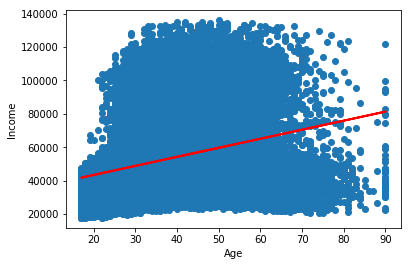

In [145]:
income.columns
y_ = income['Income'].values
X_ = income['Age'].values
plt.scatter(X_,y_)
plt.xlabel('Age')
plt.ylabel('Income')
plt.plot(income[["Age"]], yhat, 'r', lw=2)
plt.show()

# Exercise 2.2
Evaluate the model using the MSE

In [147]:
#Se calcula el MSE del test
#Librerias
from sklearn import metrics
import numpy as np
from sklearn.model_selection import train_test_split

#Se define X y Y
X  = income[["Age"]]
y  = income[["Income"]]

#train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

#Estimación del modelo
linreg2= LinearRegression(fit_intercept=True)
linreg2.fit(X_train, y_train)

#Predicción con el test
y_pred2 = linreg2.predict(X_test)

#Cálculo MSE
mse2 = 'MSE:', metrics.mean_squared_error(y_test, y_pred2)
mse2

('MSE:', 584771569.69431269)


# Exercise 2.3

Run a regression model using as features the Age and Age$^2$ using the OLS equations

In [148]:
#Librerias
from sklearn import metrics
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

#Se define X y Y
#Age
X1  = income[["Age"]]
#Income
y  = income[["Income"]]

#Age^2
X2 = X1**2

#Se une x1 y x2
X  = np.c_[X1, X2]  
X

array([[  39, 1521],
       [  50, 2500],
       [  38, 1444],
       ..., 
       [  58, 3364],
       [  22,  484],
       [  52, 2704]], dtype=int64)

In [149]:
#train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

#Estimación del modelo
linreg3= LinearRegression(fit_intercept=True)
linreg3.fit(X_train, y_train)

#Predicción con el test
y_pred3 = linreg3.predict(X_test)

#Cálculo MSE
mse3 = 'MSE:', metrics.mean_squared_error(y_test, y_pred3)
mse3

('MSE:', 538693347.6338315)

In [150]:
#Coeficientes estimados de x1(age) y x2(age*age)
linreg3.coef_

array([[ 3146.06680598,   -30.65548675]])

# Exercise 2.4


Estimate a regression using more features.

How is the performance compared to using only the Age?

In [151]:
from sklearn import metrics
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

#Se usan 4 variables ahora predictoras adicionales de Age
feature_cols = ['Age','Education-Num', 'Capital Gain', 'Hours per week', 'fnlwgt']
X = income[feature_cols]
y = income.Income

In [152]:
#train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

#Estimación del modelo
linreg4= LinearRegression(fit_intercept=True)
linreg4.fit(X_train, y_train)

#Predicción con el test
y_pred4 = linreg4.predict(X_test)

#Cálculo MSE
mse4 = 'MSE:', metrics.mean_squared_error(y_test, y_pred4)
mse4

('MSE:', 439087774.41057932)

In [153]:
#MSE del anterior modelo con solo Age
mse2 = 'MSE:', metrics.mean_squared_error(y_test, y_pred2)
mse2

#Comparando los dos modelos se identifica que tiene mejor performance 
#el modelo con más variables predictoras, dado que tiene menor MSE

('MSE:', 584771569.69431269)

In [154]:
#Coeficientes estimados para x1-'Age',x2-'Education-Num', x3-'Capital Gain', x4-'Hours per week', x5-'fnlwgt'
linreg4.coef_

array([  4.76436358e+02,   3.74127665e+03,   4.58084930e-01,
         4.25367219e+02,   6.72563506e-03])

# Exercise 2.5


Estimate a logistic regression to predict if a person is in the United States.

What is the performance of the model

In [159]:
income['isUS'] = (income['Country'] == 'United-States')*1.0
income['isUS'].value_counts()

1.0    29170
0.0     3391
Name: isUS, dtype: int64

In [168]:
#Se importan librerías
from sklearn import metrics
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

#Definición de X con algunos predictores de la base y Y
feature_cols = ['Age','Education-Num', 'Capital Gain', 'Hours per week']
X = income[feature_cols]
y = income['isUS']

In [169]:
#train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

#Entrenamiento del modelo
logreg = LogisticRegression(C=1e9)
logreg.fit(X_train, y_train)

#Predicción
y_pred_class = logreg.predict(X_test)

#Cálculo del Accuracy
print(metrics.accuracy_score(y_test, y_pred_class))

0.895590222331


In [172]:
#Se mide el performance del modelo con el AUC
y_pred_prob = logreg.predict_proba(X_test)[:, 1]
auc = metrics.roc_auc_score(y_test, y_pred_prob)
auc

0.55425552857269644

Text(0,0.5,'True Positive Rate (Sensitivity)')

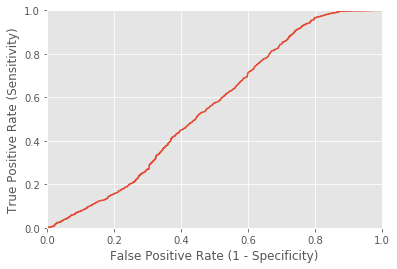

In [171]:
#Curva ROC
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_prob)
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
